In [103]:
# Group 29
# Assignment 5 | Author: Yash Kumar Sahu | Roll No: CED19I039 
# Assignment 5 | Author: Radhika Mittal | Roll No: CED19I050
# Assignment 5 | Author: Deep Patel | Roll No: ME21D0004

## Libraries


In [104]:
from matplotlib import pyplot as plt                                              
import cv2
import glob
import os
import numpy as np
import ntpath
import math


## Initialization

In [105]:
## if from colab
from urllib.request import urlopen
import cv2
import numpy as np
url = "https://raw.githubusercontent.com/DeepMechatronics/CS5102-Digital-Image-Processing-Assignment/master/Assignments/Assignment-5/pout-dark.jpg?token=GHSAT0AAAAAABRGXBN2YRJWDROG4RCTSU22YQHVKZQ"
url_response = urlopen(url)
img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
img_s = cv2.imdecode(img_array, -1)




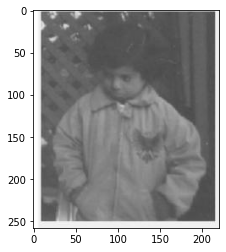

In [106]:
plt.imshow(cv2.cvtColor(img_s, cv2.COLOR_BGR2RGB))

# 1. Do histogram equalization on pout-dark and display the same

## Get histogram

In [107]:
img_d=img_s*0 ## blank destination image size template
img_d_width=img_d.shape[1]
img_d_height=img_d.shape[0]

print(img_d.shape)

hg_r=[0]*256
hg_g=[0]*256
hg_b=[0]*256
print(len(hg_r))

"""
for k in range(256):
    for i in range(img_d_height):  # scan across row or height
        for j in range(img_d_width): # scan across col or width
           if k==img_s[i][j][0]:
              hg_r[k]+=1
           if k==img_s[i][j][1]:
              hg_g[k]+=1
           if k==img_s[i][j][2]:
              hg_b[k]+=1      
"""

# Finding frequencies of the pixel values of the source image - optimized
for i in range(img_d_height):
   for j in range (img_d_width):
      b=img_s[i][j][0]
      hg_b[b]+=1
      g=img_s[i][j][1]
      hg_g[g]+=1
      r=img_s[i][j][2]
      hg_r[r]+=1

##plt.imshow(img_s[:, :, ::-1])
hg_r=np.array(hg_r)
hg_g=np.array(hg_g)
hg_b=np.array(hg_b)

# Finding the probability of each pixel value for R, G, B separately
p_r=hg_r/(img_d_width*img_d_height)
p_g=hg_g/(img_d_width*img_d_height)
p_b=hg_b/(img_d_width*img_d_height)
#print(p_r)
       


(258, 221, 3)
256


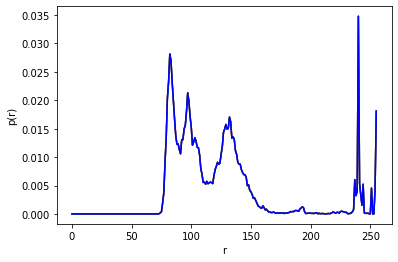

In [108]:
# Plotting the histogram of the source image
plt.plot(p_r, color='r',label='r')
plt.plot(p_g,color='g',label='g')
plt.plot(p_b,color='b',label='b')
plt.xlabel("r")
plt.ylabel("p(r)")
plt.show() 

### Cumulative probability calculation

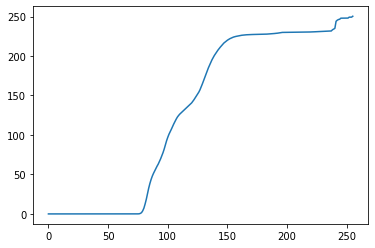

In [109]:
count=0
cp_r=[0]*256
cp_r=np.array(cp_r,np.float64)
cp_g=[0]*256
cp_g=np.array(cp_g,np.float64)
cp_b=[0]*256
cp_b=np.array(cp_b,np.float64)

# Computing the cumulative probability
cp_r[0]=p_r[0]
cp_g[0]=p_g[0]
cp_b[0]=p_b[0]

for i in range(1,256):  # scan the probability arrays
    cp_r[i]=cp_r[i-1]+p_r[i-1]
    cp_g[i]=cp_g[i-1]+p_g[i-1]
    cp_b[i]=cp_b[i-1]+p_b[i-1]

# Computing the transformed values
hgez_r=255*cp_r
hgez_g=255*cp_g
hgez_b=255*cp_b

# Plotting the transformed values for the R channel
plt.plot(hgez_r)
   

In [110]:
for i in range(img_d_height):  # scan across row or height
    for j in range(img_d_width): # scan across col or weidth
        img_d[i][j]= hgez_r[img_s[i][j]] 

## remapping in original image       

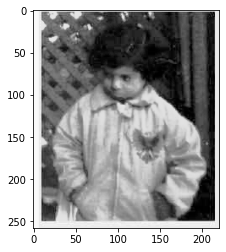

In [111]:
plt.imshow(img_d[:, :, ::-1])  

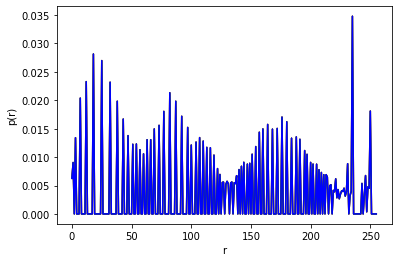

In [119]:
hgd_r=[0]*256
hgd_g=[0]*256
hgd_b=[0]*256

"""
for k in range(256):
    for i in range(img_d_height):  # scan across row or height
        for j in range(img_d_width): # scan across col or weidth

           if k==img_s[i][j][0]:
              hgt_r[k]+=1
           if k==img_s[i][j][1]:
              hgt_g[k]+=1
           if k==img_s[i][j][2]:
              hgt_b[k]+=1      
"""

for i in range(img_d_height):
   for j in range (img_d_width):
      b=img_d[i][j][0]
      hgd_b[b]+=1
      g=img_d[i][j][1]
      hgd_g[g]+=1
      r=img_d[i][j][2]
      hgd_r[r]+=1

hgd_r=np.array(hgd_r)
hgd_g=np.array(hgd_g)
hgd_b=np.array(hgd_b)
pt_r=hgd_r/(img_d_width*img_d_height)
pt_g=hgd_g/(img_d_width*img_d_height)
pt_b=hgd_b/(img_d_width*img_d_height)


plt.plot(pt_r, color='r',label='r')
plt.plot(pt_g,color='g',label='g')
plt.plot(pt_b,color='b',label='b')
plt.xlabel("r")
plt.ylabel("p(r)")
plt.show()               

## Histogram Matching

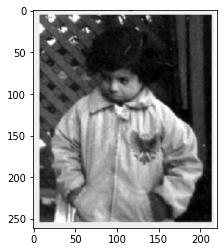

In [114]:
url = "https://raw.githubusercontent.com/DeepMechatronics/CS5102-Digital-Image-Processing-Assignment/master/Assignments/Assignment-5/pout-bright.jpg?token=GHSAT0AAAAAABRGXBN32H7IIBTSCZWIYLVYYQIUF7A"
url_response = urlopen(url)
img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
img_t = cv2.imdecode(img_array, -1)

plt.imshow(img_t[:, :, ::-1])

(258, 221, 3)
(258, 221, 3)
(258, 221, 3)
(258, 221, 3)


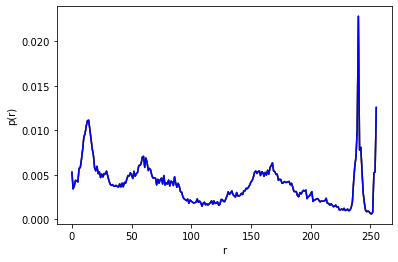

In [128]:
hgt_r=[0]*256
hgt_g=[0]*256
hgt_b=[0]*256

print("Before Slicing: ")
print(img_t.shape)
print(img_d.shape)

#Remove extra 3 rows of pixels in the template image as compared to the source image
img_t=img_t[0:258,:, :]

print("After Slicing: ")
print(img_t.shape)
print(img_d.shape)

img_t_width=img_t.shape[0]
img_t_height=img_t.shape[1]

### Histogram calculation for the template image

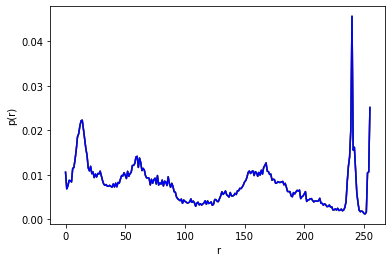

In [129]:
# Counting frequeny of pixel values
for i in range(img_t_width):
   for j in range (img_t_height):
      b=img_t[i][j][0]
      hgt_b[b]+=1
      g=img_t[i][j][1]
      hgt_g[g]+=1
      r=img_t[i][j][2]
      hgt_r[r]+=1

hgt_r=np.array(hgt_r)
hgt_g=np.array(hgt_g)
hgt_b=np.array(hgt_b)

# computing probability 
pt_r=hgt_r/(img_d_width*img_d_height)
pt_g=hgt_g/(img_d_width*img_d_height)
pt_b=hgt_b/(img_d_width*img_d_height)

# plotting the histogram
plt.plot(pt_r, color='r',label='r')
plt.plot(pt_g,color='g',label='g')
plt.plot(pt_b,color='b',label='b')
plt.xlabel("r")
plt.ylabel("p(r)")
plt.show()           